In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Data Import

Vedi dati su Kaggle https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data?select=NIFTY50_all.csv


In [2]:
df = pd.read_csv('BPCL.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [4]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BPCL,EQ,381.20,405.00,407.00,393.05,397.75,399.25,399.32,8720,3.482029e+11,NaN,NaN,NaN
1,2000-01-04,BPCL,EQ,399.25,397.75,397.75,367.40,377.45,370.50,375.71,22820,8.573699e+11,NaN,NaN,NaN
2,2000-01-05,BPCL,EQ,370.50,350.00,385.00,350.00,360.10,359.95,359.96,152538,5.490785e+12,NaN,NaN,NaN
3,2000-01-06,BPCL,EQ,359.95,362.00,384.00,362.00,381.65,380.30,380.10,59554,2.263623e+12,NaN,NaN,NaN
4,2000-01-07,BPCL,EQ,380.30,369.00,390.00,366.00,381.50,379.85,378.33,43187,1.633890e+12,NaN,NaN,NaN


In [5]:
df['Date']

0       2000-01-03
1       2000-01-04
2       2000-01-05
3       2000-01-06
4       2000-01-07
           ...    
5301    2021-04-26
5302    2021-04-27
5303    2021-04-28
5304    2021-04-29
5305    2021-04-30
Name: Date, Length: 5306, dtype: object

# DatetimeIndex

La colonna Date è riconosciuta come 'object', ma noi vogliamo che diventi l'indice del DataFrame, e in particolare che diventi un DatetimeIndex

In [6]:
df.index = pd.to_datetime(df['Date'])
df = df.sort_index()

Il DatetimeIndex ha una serie di vantaggi pratici:
- si possono ricavare i tipici attributi di una data (ora, giorno, mese etc.)
- si ordinano semplicemente con sort_index()
si può fare un 'resampling' su un diverso step temporale molto facilmente
- ...

In [7]:
df.index.dayofweek

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
            ...
            4, 0, 1, 3, 4, 0, 1, 2, 3, 4],
           dtype='int64', name='Date', length=5306)

In [8]:
df.index.month

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='Date', length=5306)

In [9]:
### si può anche cambiare la formattazione della data (non è importante per ora saperlo gestire)
df.index.strftime('%a-%d-%m-%y')

Index(['Mon-03-01-00', 'Tue-04-01-00', 'Wed-05-01-00', 'Thu-06-01-00',
       'Fri-07-01-00', 'Mon-10-01-00', 'Tue-11-01-00', 'Wed-12-01-00',
       'Thu-13-01-00', 'Fri-14-01-00',
       ...
       'Fri-16-04-21', 'Mon-19-04-21', 'Tue-20-04-21', 'Thu-22-04-21',
       'Fri-23-04-21', 'Mon-26-04-21', 'Tue-27-04-21', 'Wed-28-04-21',
       'Thu-29-04-21', 'Fri-30-04-21'],
      dtype='object', name='Date', length=5306)

In [10]:
## resampling ('T':minute, 'D':day,'W':week, 'M':month, 'Y':year)
df.resample('W').agg(np.mean)

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,
2000-01-09,378.2400,376.7500,392.7500,367.690000,379.690000,377.9700,378.684000,57363.80,2.118774e+12,NaN,NaN,NaN
2000-01-16,378.3200,380.6000,384.7000,373.400000,376.490000,377.2300,378.078000,19256.40,7.361832e+11,NaN,NaN,NaN
2000-01-23,375.8100,376.7600,382.2500,371.220000,375.550000,374.7900,376.408000,49166.80,1.858708e+12,NaN,NaN,NaN
2000-01-30,359.7375,356.8375,378.4625,346.125000,361.525000,361.2250,361.972500,68525.75,2.488028e+12,NaN,NaN,NaN
2000-02-06,383.7000,385.4000,396.4000,372.810000,382.960000,382.8200,383.090000,75721.80,2.930325e+12,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-04,427.6500,430.0000,435.0000,425.016667,432.616667,432.0500,429.663333,6054812.00,2.598610e+14,75109.666667,2.797254e+06,0.443867
2021-04-11,430.4600,430.5300,434.0900,425.340000,428.140000,428.1000,429.392000,4301967.80,1.845979e+14,49768.000000,1.513421e+06,0.357840
2021-04-18,410.9500,409.2375,417.8125,402.950000,407.975000,408.0000,410.000000,7145673.75,2.936936e+14,83672.750000,2.702233e+06,0.381675


In [11]:
df.loc['2012-01-10':'2012-01-15']

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,,
2012-01-10,2012-01-10,BPCL,EQ,469.05,472.00,486.60,470.55,482.50,482.70,480.60,354887,1.705605e+13,15551.0,161133.0,0.4540
2012-01-11,2012-01-11,BPCL,EQ,482.70,486.95,509.85,485.15,508.00,507.50,499.99,770161,3.850712e+13,27331.0,382577.0,0.4967
2012-01-12,2012-01-12,BPCL,EQ,507.50,509.40,516.00,500.10,513.40,512.45,511.09,774656,3.959198e+13,13548.0,520689.0,0.6722
2012-01-13,2012-01-13,BPCL,EQ,512.45,517.40,519.00,506.10,506.55,508.65,512.00,252079,1.290637e+13,11744.0,77731.0,0.3084


# Modeling

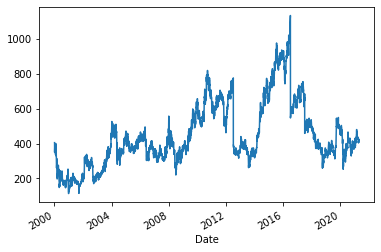

In [12]:
df['Open'].plot()
plt.show()

### Target: shifted Open

Il nostro obiettivo è quello di prevedere l'Open del giorno successivo a partire dall'Open del giorno corrente

In [13]:
df['D+1 OPEN'] = df['Open'].shift(-1).copy()

In [14]:
df.isna().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
D+1 OPEN                 1
dtype: int64

In [17]:
df = df[["Open","D+1 OPEN"]].dropna()  #cosi elimino solo il nan in D+1 OPEN

In [18]:
df

,Open,D+1 OPEN
Date,,
2000-01-03,405.00,397.75
2000-01-04,397.75,350.00
2000-01-05,350.00,362.00
2000-01-06,362.00,369.00
2000-01-07,369.00,380.00
...,...,...
2021-04-23,417.30,426.00
2021-04-26,426.00,417.50
2021-04-27,417.50,422.00


In [20]:
df.isna().sum()

Open        0
D+1 OPEN    0
dtype: int64

In [22]:
from pandas.io.formats.info import DataFrameTableBuilderVerbose
DataFrameTableBuilderVerbose

pandas.io.formats.info.DataFrameTableBuilderVerbose

### Train_test_split

Come sempre splittiamo il dataset. Ma questa volta bisogna ricordarsi di non usare Shuffle=True!

In [ ]:
#from sklearn.model_selection import train_test_split
#train_df, test_df = train_test_split(df, test_size=0.2, shuffle=False)

In [21]:
### oppure....inserisco le date direttamente cosi so dove inizia il test
train_df = df.loc[:'2018-12-31'].copy()
test_df = df.loc['2019-01-01':].copy()

In [23]:
features = ['Open']
X_train = train_df[features].copy()
X_test = test_df[features].copy()

In [24]:
target_name = 'D+1 OPEN'
y_train = train_df[target_name].copy()
y_test = test_df[target_name].copy()

In [25]:
X_train

,Open
Date,
2000-01-03,405.00
2000-01-04,397.75
2000-01-05,350.00
2000-01-06,362.00
2000-01-07,369.00
...,...
2018-12-24,374.10
2018-12-26,368.80
2018-12-27,361.00


In [26]:
y_train

Date
2000-01-03    397.75
2000-01-04    350.00
2000-01-05    362.00
2000-01-06    369.00
2000-01-07    380.00
               ...  
2018-12-24    368.80
2018-12-26    361.00
2018-12-27    361.80
2018-12-28    361.90
2018-12-31    361.05
Name: D+1 OPEN, Length: 4729, dtype: float64

### RandomForestRegressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

model = RandomForestRegressor()
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

In [28]:
print(r2_train)
print(r2_test)

0.9972784415461571
0.9474570398579581


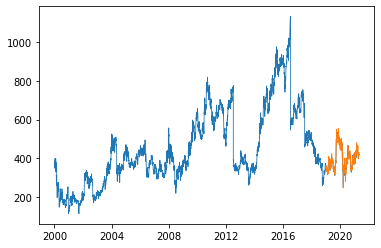

In [29]:
plt.plot(df[target_name], linewidth=0.8)
plt.plot(pd.Series(test_preds, y_test.index), linewidth=0.8),
plt.show()

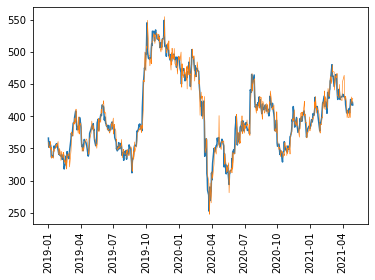

In [30]:

plt.plot(y_test)
plt.plot(pd.Series(test_preds, y_test.index), linewidth=0.6)
plt.xticks(rotation=90)
plt.show()

Sembra piuttosto buono! In realtà però quello che davvero ci interessa è la direzione del prezzo...! Cioè, mi interessa un segnale COMPRA / VENDI che possa essere eseguito all'OPEN. Vediamo come andiamo sulla direzione

In [31]:
test_df['preds'] = pd.Series(test_preds, index=y_test.index)

In [36]:
test_df['target_direction'] = np.sign(test_df['D+1 OPEN']-test_df['Open'])
test_df

,Open,D+1 OPEN,preds,target_direction,pred_direction
Date,,,,,
2019-01-01,361.05,366.0,359.671301,1.0,-1.0
2019-01-02,366.00,352.0,353.700708,-1.0,-1.0
2019-01-03,352.00,351.8,352.485101,-1.0,1.0
2019-01-04,351.80,360.0,350.676383,1.0,-1.0
2019-01-07,360.00,355.1,361.265095,-1.0,1.0
...,...,...,...,...,...
2021-04-23,417.30,426.0,417.114914,1.0,-1.0
2021-04-26,426.00,417.5,429.927000,-1.0,1.0
2021-04-27,417.50,422.0,419.629185,1.0,1.0


In [35]:
test_df['pred_direction'] = np.sign(test_df['preds']-test_df['Open'])
test_df

,Open,D+1 OPEN,preds,target_direction,pred_direction
Date,,,,,
2019-01-01,361.05,366.0,359.671301,1.0,-1.0
2019-01-02,366.00,352.0,353.700708,-1.0,-1.0
2019-01-03,352.00,351.8,352.485101,-1.0,1.0
2019-01-04,351.80,360.0,350.676383,1.0,-1.0
2019-01-07,360.00,355.1,361.265095,-1.0,1.0
...,...,...,...,...,...
2021-04-23,417.30,426.0,417.114914,1.0,-1.0
2021-04-26,426.00,417.5,429.927000,-1.0,1.0
2021-04-27,417.50,422.0,419.629185,1.0,1.0


In [37]:
from sklearn.metrics import accuracy_score

print(accuracy_score(test_df['target_direction'],test_df['pred_direction']))

0.4600694444444444


Malissimo!! Sarebbe quasi meglio lanciare una moneta

In [ ]:
df = pd.read_csv('BPCL.csv')
df.index = pd.to_datetime(df['Date'])
df = df.sort_index()

target_name = 'D+1 OPEN'
df[target_name] = df['Open'].shift(-1)
df = df.dropna()

In [ ]:
df['OPEN D-1'] = df['Open'].rolling(3).mean()
df['OPEN D-3'] = df['Open'].rolling(7).mean()
df['OPEN D-7'] = df['Open'].rolling(30).mean()

df = df.dropna()

In [ ]:
train_df = df.loc[:'2018-12-31'].copy()
test_df = df.loc['2019-01-01':].copy()

In [ ]:
features = ['Open','OPEN D-1','OPEN D-3','OPEN D-7']
X_train = train_df[features].copy()
X_test = test_df[features].copy()

y_train = train_df[target_name].copy()
y_test = test_df[target_name].copy()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_percentage_error

model = RandomForestRegressor()
model = model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(r2_train)
print(r2_test)

test_df['preds'] = pd.Series(test_preds, index=y_test.index)
test_df['target_direction'] = np.sign(test_df['D+1 OPEN']-test_df['Open'])
test_df['pred_direction'] = np.sign(test_df['preds']-test_df['Open'])

from sklearn.metrics import accuracy_score
print(accuracy_score(test_df['target_direction'],test_df['pred_direction']))

0.9980952766257393
0.9553501857752416
0.484375


In [ ]:
X_train

,Open,OPEN D-1,OPEN D-3,OPEN D-7,OPEN D-7
Date,,,,,
2000-01-21,372.50,376.0,375.0,380.00,380.00
2000-01-24,385.00,372.5,381.3,380.00,380.00
2000-01-25,350.00,385.0,376.0,378.00,378.00
2000-01-27,355.00,350.0,372.5,379.00,379.00
2000-01-28,337.35,355.0,385.0,375.00,375.00
...,...,...,...,...,...
2018-12-24,374.10,374.7,358.4,329.75,329.75
2018-12-26,368.80,374.1,357.0,334.65,334.65
2018-12-27,361.00,368.8,374.7,345.00,345.00


# PROPHET

In [39]:
## preparo i dati per Prophet (deve essere un DataFrame con colonne ['ds','y'])

df = pd.read_csv('BPCL.csv')
df.index = pd.to_datetime(df['Date'])
df = df.sort_index()

df['ds'] = df.index
df['y'] = df['Open'].copy()

train_df = df[['ds','y']].loc[:'2018-12-31'].copy()
test_df = df[['ds','y']].loc['2019-01-01':].copy()

from fbprophet import Prophet
model = Prophet(weekly_seasonality=False) # the Prophet class (model)
model.fit(train_df) # fit the model using all data

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [40]:
test_preds_df = model.predict(test_df)

In [41]:
test_preds_df

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-01-01,360.381521,275.668223,453.603567,360.381521,360.381521,4.320266,4.320266,4.320266,4.320266,4.320266,4.320266,0.0,0.0,0.0,364.701787
1,2019-01-02,359.992963,282.272747,458.834796,359.992963,359.992963,4.867208,4.867208,4.867208,4.867208,4.867208,4.867208,0.0,0.0,0.0,364.860171
2,2019-01-03,359.604405,278.566380,455.626210,359.604405,359.604405,5.368666,5.368666,5.368666,5.368666,5.368666,5.368666,0.0,0.0,0.0,364.973071
3,2019-01-04,359.215847,275.615033,450.525663,359.215847,359.215847,5.816761,5.816761,5.816761,5.816761,5.816761,5.816761,0.0,0.0,0.0,365.032608
4,2019-01-07,358.050173,278.328693,447.114632,358.050173,358.050173,6.785127,6.785127,6.785127,6.785127,6.785127,6.785127,0.0,0.0,0.0,364.835300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
572,2021-04-26,31.661484,-297.541346,376.377447,-318.500644,348.090738,17.710083,17.710083,17.710083,17.710083,17.710083,17.710083,0.0,0.0,0.0,49.371567
573,2021-04-27,31.272926,-314.927353,368.759041,-319.739526,348.364483,17.213847,17.213847,17.213847,17.213847,17.213847,17.213847,0.0,0.0,0.0,48.486773
574,2021-04-28,30.884368,-301.544380,387.191075,-320.978407,348.638228,16.700062,16.700062,16.700062,16.700062,16.700062,16.700062,0.0,0.0,0.0,47.584430
575,2021-04-29,30.495810,-309.250533,381.475939,-322.217289,348.911972,16.184635,16.184635,16.184635,16.184635,16.184635,16.184635,0.0,0.0,0.0,46.680445


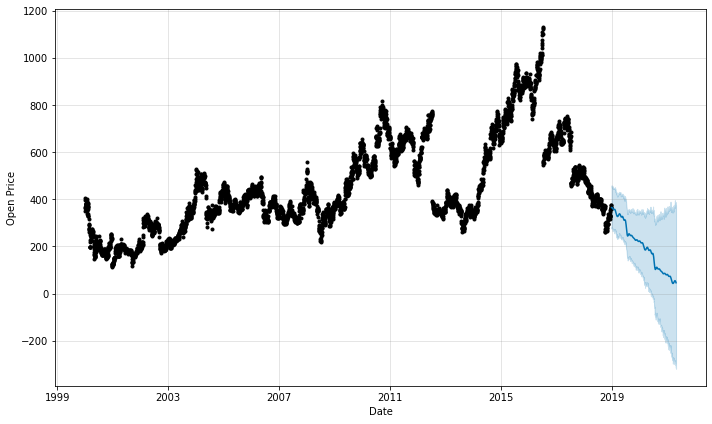

In [42]:
model.plot(test_preds_df)
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

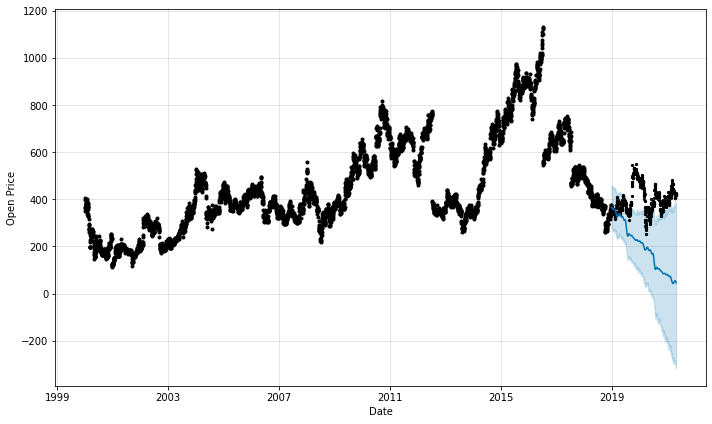

In [43]:
model.plot(test_preds_df)
plt.scatter(x=test_df.index, y=test_df['y'], s=5, c='k')

plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()